In [3]:
breakpoint

NameError: name 'breakpoint' is not defined

In [2]:
import pdb

In [4]:
pdb.breakpoint

AttributeError: module 'pdb' has no attribute 'breakpoint'

Making a new frame...
Building model...
Fitted 1 variables to the figure.
Initialising...
Updating...
Updated.
Initialisation complete!
Making a local archive...
Nothing to archive yet!
Frame built!
Iterating step 0 ...
Iteration complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: mesh
Saving var to disk: temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving datasets...
Datasets saved.
Checkpointed!
Clearing all data...
All data cleared!
Making a local archive...
Archiving...
Deleting model directory...
Model directory deleted.
Archived!
Making a backup...
Forking model to new directory...
Model forked to directory: /home/jovyan/workspace/out/test/backup
Backup saved.
Unarchiving the local archive...
Unarchiving...
Unarchiving the local archive...
Deleting archive...
Model archive deleted.
Unarchived!
{'fram


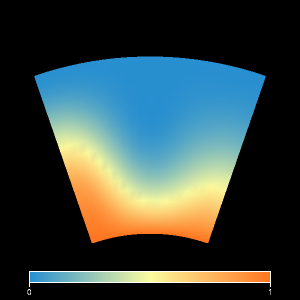

In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

import planetengine

planetengine.paths.delete_testdir()

system = planetengine.systems.arrhenius.build(
    planetengine.systems.isovisc.build(),
    Ra = 3e5,
    res = 16,
    f = 0.5
    )
initials = {
    'temperatureField': planetengine.initials.sinusoidal.build(
        planetengine.initials.sinusoidal.build(
            freq = 2,
            pert = 0.4
            )
        )
    }

model = planetengine.model.make_model(
    system,
    initials,
    outputPath = planetengine.paths.testPath
    )

model.iterate()

model.checkpoint()

model.unarchive()

model2 = planetengine.frame.load_frame(planetengine.paths.testPath, model.instanceID)

model2.checkpoint()

model2.iterate()

model2.checkpoint()

model2.report()